#### Udacity - CRISP-DM Project - A closer look into the data of Seattle’s Airbnb market

#### 1. BUSINESS UNDERSTANDING
The data provided by AirBnb from Seattle contains details on the listings, the calendar availability and user reviews.We use this data set to understand the data and answer the folliwng questions in the following theree ctaegories.

##### Pricing Trends
- How does pricing increase or decrease by season and what is the peak season in Seattle?
- How does pricing increase or decrease by neighborhood and which ones are the priciest neighborhoods in Seattle?
- How does property types within neighborhoods impact price for the most expensive neighborhoods and most common property types?

#####  Sentiment Analysis of Reviews
- How can we categorize reviews based on sentiments?
- Can we map positive and negative sentiments from reviews to neighborhoods to understand which neighborhoonds rank higher on the positive sentiment scale and which ones rank higher on the negative sentiment scale?
- Can we explore some of the worst reviews for additional insights?

##### Price Prediction
- Can we predict price for a given listing? What factors of the listing correlate best for predicting price?

Understanding the pricing trends can help understandseasonality and give some insights on the neighborhoods in Seattle. Thus, it helps airbnb with inventory deployment.

Sentiment analysis done on the user reviews can help AirBnB understand the consumer interest. Also, sentiment association may help with detection of improper neighborhoods.

The third factor, viz. Price prediction can help in giving insights intp pricing factors.

#### 2. DATA UNDERSTANDING
Let's start to understand the data better...

In [240]:
# Import statements
import numpy as npy
import pandas as pds
import matplotlib.pyplot as pt
from IPython import display
%matplotlib inline
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [241]:
# Read in the calendar data set
df_seattle_cal = pds.read_csv('./seattle/calendar.csv')
df_seattle_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [242]:
# Read in the listings data set
df_seattle_list = pds.read_csv('./seattle/listings.csv')
df_seattle_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

Exploring Calendar Dataset

In [243]:
# Read in the reviews data set
df_seattle_rev = pds.read_csv('./seattle/reviews.csv')
df_seattle_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


Exploring Listing Dataset

In [244]:
# Print rows and columns in calendar data set
print("Number of rows and columns: ", df_seattle_cal.shape)
# Assess null values
print(df_seattle_cal.isnull().sum())
# Describe
print(df_seattle_cal.describe(include='all'))

Number of rows and columns:  (1393570, 4)
listing_id         0
date               0
available          0
price         459028
dtype: int64
          listing_id        date available    price
count   1.393570e+06     1393570   1393570   934542
unique           NaN         365         2      669
top              NaN  2016-03-19         t  $150.00
freq             NaN        3818    934542    36646
mean    5.550111e+06         NaN       NaN      NaN
std     2.962274e+06         NaN       NaN      NaN
min     3.335000e+03         NaN       NaN      NaN
25%     3.258213e+06         NaN       NaN      NaN
50%     6.118244e+06         NaN       NaN      NaN
75%     8.035212e+06         NaN       NaN      NaN
max     1.034016e+07         NaN       NaN      NaN


#### FINDINGS
Based on the above, it seems like there will be little data prep required to use this dataset. The only missing values are in the price column which could be just due to the fact that the listing is unavailable for those days.

#### LISTINGS Data Set
Next, let's explore the Listings data set. We wil be looking at a few things:

Number of rows and columns in the dataset
Columns with missing values and columns that have no missing values
Describe the dataset to see features about each column
Explore some of the categorical features

# Prepare Data
Preparing Calendar Dataset

In [245]:
# Print rows and columns in calendar data set
print("Number of rows and columns: ", df_seattle_list.shape)
# Assess null values
print(df_seattle_list.isnull().sum())

Number of rows and columns:  (3818, 92)
id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rat

In [246]:
# Describe
print(df_seattle_list.describe(include='all'))

                  id                           listing_url     scrape_id  \
count   3.818000e+03                                  3818  3.818000e+03   
unique           NaN                                  3818           NaN   
top              NaN  https://www.airbnb.com/rooms/8064351           NaN   
freq             NaN                                     1           NaN   
mean    5.550111e+06                                   NaN  2.016010e+13   
std     2.962660e+06                                   NaN  0.000000e+00   
min     3.335000e+03                                   NaN  2.016010e+13   
25%     3.258256e+06                                   NaN  2.016010e+13   
50%     6.118244e+06                                   NaN  2.016010e+13   
75%     8.035127e+06                                   NaN  2.016010e+13   
max     1.034016e+07                                   NaN  2.016010e+13   

       last_scraped                    name  \
count          3818                    3

In [247]:
# Explore Categorical Feature - experiences_offered
print('Value counts for experiences_offered: ', df_seattle_list['experiences_offered'].value_counts())

Value counts for experiences_offered:  none    3818
Name: experiences_offered, dtype: int64


In [248]:
# Explore Categorical Feature - host_location
print('Value counts for host_location: ', df_seattle_list['host_location'].value_counts())

Value counts for host_location:  Seattle, Washington, United States                                    3259
US                                                                     246
Spokane, Washington, United States                                      41
Kent, Washington, United States                                         34
Los Angeles, California, United States                                  13
Bellevue, Washington, United States                                     12
San Francisco, California, United States                                11
Mercer Island, Washington, United States                                10
Kirkland, Washington, United States                                      8
New York, New York, United States                                        6
Seattle                                                                  5
Sammamish, Washington, United States                                     5
Vashon, Washington, United States                                  

#### FINDINGS
The experiences offered are None for all rows. The host_location column can use some standardization if we are to use it for analysis. For example: "Seattle, Washington, United States", "Seattle" and "Seattle, Washington" should be considered as the same.

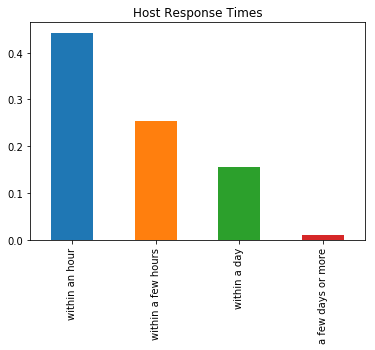

In [249]:
# Explore Categorical Feature - host_response_time
host_response_vals = df_seattle_list['host_response_time'].value_counts()
(host_response_vals/df_seattle_list.shape[0]).plot(kind="bar");
pt.title("Host Response Times");

#### FINDINGS
It looks like a good percentage of hosts respond within an hour and it's a downward trend from there.

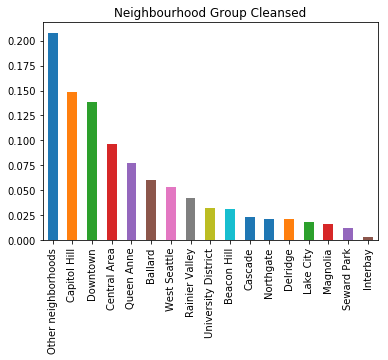

In [250]:
# Explore Categorical Feature - neighborhood_group_cleansed
neigh_vals = df_seattle_list['neighbourhood_group_cleansed'].value_counts()
(neigh_vals/df_seattle_list.shape[0]).plot(kind="bar");
pt.title("Neighbourhood Group Cleansed");

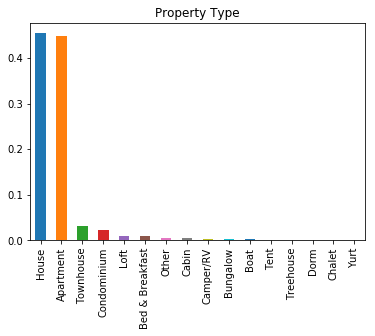

In [251]:
# Explore Categorical Feature - property_type
prop_vals = df_seattle_list['property_type'].value_counts()
(prop_vals/df_seattle_list.shape[0]).plot(kind="bar");
pt.title("Property Type");

### FINDINGS
It's good to know that apartments and houses dominate the listings data set. We can focus on these if needed for any of our analysis.

#### REVIEWS Data Set
Next, let's explore the Reviews data set. We wil be looking at a few things:

1. Number of rows and columns in the dataset
2. Columns with missing values and columns that have no missing values
3. Describe the dataset to see features about each column

In [252]:
# Print rows and columns in reviews data set
print("Number of rows and columns: ", df_seattle_rev.shape)
# Assess null values
print(df_seattle_rev.isnull().sum())
# Describe
print(df_seattle_rev.describe(include='all'))

Number of rows and columns:  (84849, 6)
listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64
          listing_id            id        date   reviewer_id reviewer_name  \
count   8.484900e+04  8.484900e+04       84849  8.484900e+04         84849   
unique           NaN           NaN        1930           NaN         14380   
top              NaN           NaN  2015-09-21           NaN         David   
freq             NaN           NaN         580           NaN           870   
mean    3.005067e+06  3.058765e+07         NaN  1.701301e+07           NaN   
std     2.472877e+06  1.636613e+07         NaN  1.353704e+07           NaN   
min     4.291000e+03  3.721000e+03         NaN  1.500000e+01           NaN   
25%     7.946330e+05  1.725127e+07         NaN  5.053141e+06           NaN   
50%     2.488228e+06  3.228809e+07         NaN  1.413476e+07           NaN   
75%     4.694479e+06  4.457648e+07         NaN 

#### Question 1 - PRICE ANALYSIS
1. Understand price increases/decreases by season and detect peak season in Seattle
2. Understand price increases/decreases by neighborhood and detect pricey neighborhoods in Seattle
3. Understand how property types within neighborhoods impact price for a handful of neighborhoods and property types

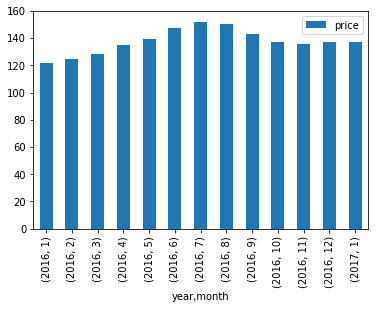

In [253]:
# Plot the average price by month 
df_seattle_cal['year'] = pds.DatetimeIndex(df_seattle_cal['date']).year
df_seattle_cal['month'] = pds.DatetimeIndex(df_seattle_cal['date']).month

# In order to average price, we will be converting it to float and removing the $ sign
df_seattle_cal['price'] = df_seattle_cal['price'].replace('[\$,]', '', regex=True).astype(float)

df_seattle_cal.groupby(['year','month'])[['price']].mean().plot(kind="bar");

#### FINDINGS
Based on the above chart, it shows that June through August are the peak months, with July being the highest. A quick Google search (https://santorinidave.com/best-time-to-visit-seattle) confirms my assumption that these months have the best weather in Seattle with summer in full swing and low chances of rain.

Also, it seems like the year starts out slow, with January having the lowest average price. Towards Spring and the holiday season, prices start to pick back up a little around Apr/May and Nov/Dec respectively.

                                price
neighbourhood_cleansed               
Southeast Magnolia         231.705882
Portage Bay                227.857143
Westlake                   194.470588
West Queen Anne            187.769231
Montlake                   182.789474
Briarcliff                 176.571429
Sunset Hill                176.055556
Industrial District        173.333333
Alki                       171.619048
Windermere                 169.900000
Pioneer Square             169.260870
Central Business District  164.213592
Fauntleroy                 164.100000
Belltown                   162.893162
East Queen Anne            159.414634
Madrona                    158.234043
Pike-Market                157.785714
North Queen Anne           150.240741
Green Lake                 149.018519
Lawton Park                147.566667
Holly Park                 147.166667
North Admiral              146.408163
View Ridge                 139.000000
Lower Queen Anne           138.202128
First Hill  

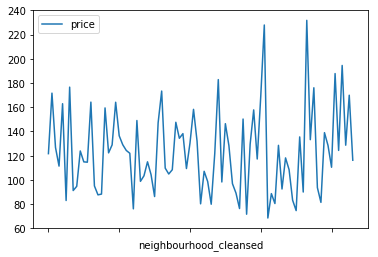

In [254]:
# Plot the average price by neighborhood

# In order to average price, we will be converting it to float and removing the $ sign
df_seattle_list['price'] = df_seattle_list['price'].replace('[\$,]', '', regex=True).astype(float)

print(df_seattle_list.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False))
df_seattle_list.groupby(['neighbourhood_cleansed'])[['price']].mean().plot();

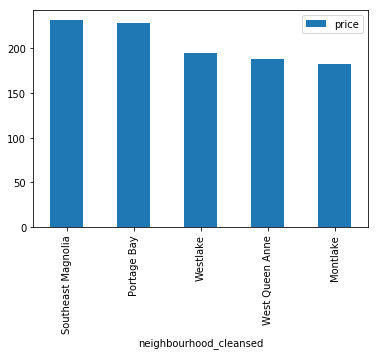

In [255]:
# Plot top 10 neighborhoods
top10_neigh = df_seattle_list.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False).head()
top10_neigh.plot(kind='bar');

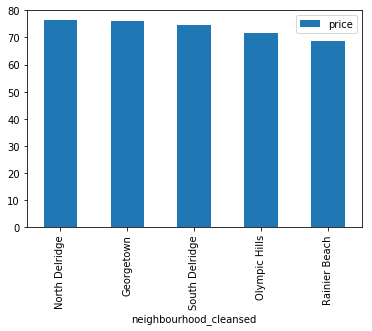

In [256]:
# Plot bottom 10 neighborhoods
bottom10_neigh = df_seattle_list.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False).tail()
bottom10_neigh.plot(kind='bar');

#### FINDINGS
Based on the above analysis, there is definitely price fluctuations based on neighborhoods. The Southeast Magnolia neighborhood seems like the priciest of all, averaging at $231.

Followed by Portage Bay at $227.

Rainier Beach seems like the cheapest at $68 average price.

In [257]:
# Explore property types within neighborhoods and how they impact price
# Focus on the top 5 expensive Neighborhoods from above - Southeast Magnolia, Portage Bay, Westlake, West Queen Anne and Montlake
# Focus on property types - House and Apartment

values_keep_neigh = ('Southeast Magnolia','Portage Bay','Westlake','West Queen Anne','Montlake')
values_keep_prop = ('Apartment','House')
df_seattle_list_pruned1 = df_seattle_list.loc[df_seattle_list['neighbourhood_cleansed'].isin(values_keep_neigh)]
df_seattle_list_pruned2 = df_seattle_list_pruned1.loc[df_seattle_list['property_type'].isin(values_keep_prop)]

df_neigh_prop = df_seattle_list_pruned2.groupby(['neighbourhood_cleansed','property_type'])[['price']].mean().reset_index()
df_neigh_prop

,neighbourhood_cleansed,property_type,price
0,Montlake,Apartment,133.333333
1,Montlake,House,191.533333
2,Portage Bay,Apartment,113.833333
3,Portage Bay,House,340.285714
4,Southeast Magnolia,Apartment,219.600000
5,Southeast Magnolia,House,234.100000
6,West Queen Anne,Apartment,128.208333
7,West Queen Anne,House,247.393939
8,Westlake,Apartment,142.400000
9,Westlake,House,168.000000


In [258]:
price_arr = df_neigh_prop['price'].values
price_arr = npy.reshape(price_arr, (5,2))
price_arr.shape

(5, 2)

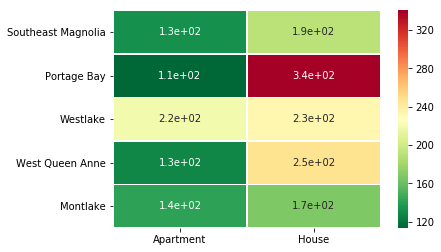

In [259]:
# Heatmap reference: https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe
idx = ['Southeast Magnolia','Portage Bay','Westlake','West Queen Anne','Montlake']
cols = ['Apartment', 'House']
df = pds.DataFrame(price_arr, index=idx, columns=cols)

# _r reverses the normal order of the color map 'RdYlGn'
sns.heatmap(df, cmap='RdYlGn_r', linewidths=0.5, annot=True);

#### FINDINGS
We focused on the top 5 expensive neighbourhoods from the above analysis as well as Houses and Apartments mostly since based on the previous analysis, we know they make up a good percentage of property types.

Based on the above, we can see that Houses in Portage Bay are the most expensive followed by Houses in West Queen Anne and Westlake. It is interesting to note that in Westlake, both Houses and Apartments can be found at approx. the same price.

#### Question 2 - SENTIMENT ANALYSIS OF REVIEWS
1. Understand positive and negative sentiments from review comments
2. Map the positive and negative sentiments to neighborhoods to understand which neighborhoonds rank higher on the positive sentiment scale and which ones rank higher on the negative sentiment scale
3. Explore some of the worst reviews

In [260]:
# Create a smaller data frame with just listing ids and review comments
df_comm = df_seattle_rev[['listing_id', 'comments']].copy()
df_comm.head()

,listing_id,comments
0,7202016,Cute and cozy place. Perfect location to every...
1,7202016,Kelly has a great room in a very central locat...
2,7202016,"Very spacious apartment, and in a great neighb..."
3,7202016,Close to Seattle Center and all it has to offe...
4,7202016,Kelly was a great host and very accommodating ...


In [261]:
# Function to take a listing id and pass back the neighbourhood_cleansed field from the listings data set
# Initially, I tried with the neighbourhood field in the listings dataset, but found that some values were blank, so I used neighbourhood_cleansed field
def get_neighborhood(listing_id):
    '''
    Function to take a listing id and pass back the neighbourhood_cleansed field from the listings data set
    InpyUT:
    listing_id - listing_id field for a particular listing
    OUTPUT:
    neighbourhood - the neighbourhood_cleansed field associated with a particular listing_id
    
    Helps to map each listing_id to it's respective neighbourhood in order to associate reviews with neighbourhoods
    '''
    neighbourhood = df_seattle_list.loc[df_seattle_list['id'] == listing_id, 'neighbourhood_cleansed'].iloc[0]
    return neighbourhood

# Test function
get_neighborhood(7202016)

'Lower Queen Anne'

In [262]:
# Apply get_neighborhood function to the listing ids
df_comm['neighbourhood'] = df_comm['listing_id'].apply(get_neighborhood)
df_comm.head()

,listing_id,comments,neighbourhood
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne
2,7202016,"Very spacious apartment, and in a great neighb...",Lower Queen Anne
3,7202016,Close to Seattle Center and all it has to offe...,Lower Queen Anne
4,7202016,Kelly was a great host and very accommodating ...,Lower Queen Anne


In [263]:
# Check to see if any listing ids don't have neighborhoods associated
df_comm['neighbourhood'].isnull().sum()

0

In [264]:
# SentimentIntensityAnalyzer reference: https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    '''
    Function to run sentiment intensity analyzer on a sentence and return compound polarity score
    InpyUT:
    sentence - the text of the review comments 
    OUTPUT:
    score['compound'] - the compound score combining the positive, negative and neutral scores
    
    Provides the compound score for a particular sentence for sentiment analysis
    '''
    sentence = str(sentence)
    score = analyser.polarity_scores(sentence)
    return score['compound']


df_comm['polarity_score'] = df_comm['comments'].apply(sentiment_analyzer_scores)
df_comm.head()

,listing_id,comments,neighbourhood,polarity_score
0,7202016,Cute and cozy place. Perfect location to every...,Lower Queen Anne,0.7901
1,7202016,Kelly has a great room in a very central locat...,Lower Queen Anne,0.9872
2,7202016,"Very spacious apartment, and in a great neighb...",Lower Queen Anne,0.8718
3,7202016,Close to Seattle Center and all it has to offe...,Lower Queen Anne,0.8313
4,7202016,Kelly was a great host and very accommodating ...,Lower Queen Anne,0.9783


In [265]:
# Print number of positive, negative and neutral compound polarity scores
print('Positive compound scores: ',df_comm['polarity_score'][df_comm['polarity_score'] > 0].count())
print('Negative compound scores: ',df_comm['polarity_score'][df_comm['polarity_score'] < 0].count())
print('Neutral compound scores: ',df_comm['polarity_score'][df_comm['polarity_score'] == 0].count())

Positive compound scores:  82444
Negative compound scores:  849
Neutral compound scores:  1556


In [266]:
# Group by neighbourhood and average the polarity scores
polarity_ngh = df_comm.groupby('neighbourhood')[['polarity_score']].mean().sort_values(by='polarity_score',ascending=False)

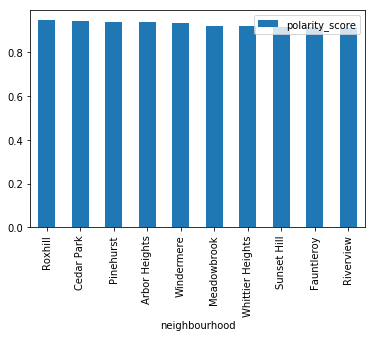

In [267]:
# Visualize top neighborhoods based on reviews
polarity_ngh.head(10).plot(kind='bar');

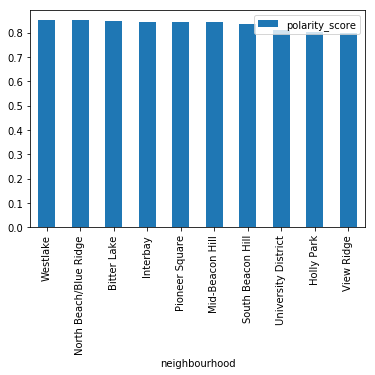

In [268]:
# Visualize bottom 10 neighborhoods based on reviews
polarity_ngh.tail(10).plot(kind='bar');

#### FINDINGS
Roxhill, Cedar Park and Pinehurst are some of the neighborhoods that have top reviews. Relatively, the lower ranking neighborhoods are University District, Holly Park and View Ridge

In [269]:
# Explore the worst reviews
df_comm.sort_values(by='polarity_score',ascending=False).tail(10)

,listing_id,comments,neighbourhood,polarity_score
32787,5805162,Die Ankunft war unkompliziert. Die Lage ist ru...,Ravenna,-0.9881
14908,685600,Das Zimmer war wie beschrieben und die Umgebun...,Lawton Park,-0.9885
1786,208356,Die Unterkunft ist so wie beschrieben und die ...,International District,-0.9892
22483,6115704,Beautiful Condo - Beware : NO AC!\nWe stayed a...,Central Business District,-0.9908
18347,26116,Für den Aufenthalt in einer fremdem Stadt hatt...,Broadway,-0.9927
75564,1775016,Staying at Robert’s place was a nightmare. At ...,Broadway,-0.9941
32404,3291777,Melissa replied to our request and approved bu...,University District,-0.9956
84378,4577542,"Die Unterkunft war sehr schön und genau so, wi...",Minor,-0.9961
29434,1018204,"leider war esnicht so fein, da die unterkunft ...",Minor,-0.9970
50261,258571,Wir sind 5 Nächte geblieben. Und es ist eine A...,Broadway,-0.9975


#### FINDINGS
It is interesting to see that most of the reviews that were rated badly on the polarity score seem to be in a different language other than English! Perhaps this is a limitation of the Sentiment Intensity Analyzer.

The other 3 reviews seem to be genuinely bad, with users complaining about the lack of A/C and fans, host being rude, construction noise ruining people's stay, poor condition of the place etc.

#### Question 3 - PRICE PREDICTION
1. Predict price for a given listing.
2. What factors correlate well to predicting price?

In [270]:
# Check if price has missing values, if it does, we want to remove those records from the dataset
df_seattle_list['price'].isnull().sum()

0

#### FINDINGS
All records in the listings dataset have price information available to use.

Based on the field definitions, there are some columns that seem less likely to impact price, so we will drop these from the dataset in order to work with a cleaner and smaller dataset. The reasons for dropping these fields are mostly:

- ID field or meta data associated with the listing
- Other fields that capture same/similar information (eg: using country code and dropping country)
- Dropping very granular fields such as street, zipcode, latitude, longitude etc. and keeping the analysis at the city level

The columns we will be dropping are: id,listing_url,scrape_id,last_scraped,thumbnail_url,medium_url,xl_picture_url,host_id, host_url,host_thumbnail_url,host_verifications,street,neighbourhood,neighbourhood_group_cleansed,zipcode,smart_location,country,latitude,longitude,weekly_price,monthly_price,calendar_updsated,calendar_last_scraped,first_review,last_review, calculated_host_listings_count,reviews_per_month

In [271]:
df_seattle_list.shape

(3818, 92)

In [272]:
# Drop columns that are less likely to have an impact on price
df_lst = df_seattle_list.copy()
cols_less_impact = ['id','listing_url','scrape_id','last_scraped','thumbnail_url','medium_url','xl_picture_url','host_id','host_url','host_thumbnail_url','host_verifications','street','neighbourhood','neighbourhood_group_cleansed','zipcode','smart_location','country','latitude','longitude','weekly_price','monthly_price','calendar_updated','calendar_last_scraped','first_review','last_review','calculated_host_listings_count','reviews_per_month']
df_lst = df_lst.drop(cols_less_impact, axis=1)
df_lst.shape

(3818, 65)

In [273]:
# Find columns with all missing values if any 
df_lst.columns[df_lst.isnull().all()].tolist()

['license']

In [274]:
# Drop license column
df_lst = df_lst.drop('license', axis=1)
df_lst.shape

(3818, 64)

In [275]:
# Review all the numerical columns and assess missing values

num_cols = df_lst.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    print(col,df_lst[col].isnull().sum())

host_listings_count 2
host_total_listings_count 2
accommodates 0
bathrooms 16
bedrooms 6
beds 1
square_feet 3721
price 0
guests_included 0
minimum_nights 0
maximum_nights 0
availability_30 0
availability_60 0
availability_90 0
availability_365 0
number_of_reviews 0
review_scores_rating 647
review_scores_accuracy 658
review_scores_cleanliness 653
review_scores_checkin 658
review_scores_communication 651
review_scores_location 655
review_scores_value 656


#### FINDINGS
bathrooms - There are 16 rows with Nan for bathrooms. Since it's a small percentage of rows, I have decided to set bathrooms to 0 for Nan values

bedrooms - Looking at the dataset, since all the rows with blank bedroom field have beds value of at least 1, I will use 1 for bedrooms where bedrooms is Nan

beds - For the 1 record that have beds as Nan, bed_type is specified as Real Bed, so I will set beds to 1 for this case

square_feet - Since a good percentage of this field is Nan, I am going to drop this column

review_scores columns - Since these are review related scores, I will be setting all Nan values to 0 assuming no review scores for these listings.

host_listings_count and host_total_listings_count - There are only 2 rows with no values. Looking at the data, I determined that these host IDs only have 1 record associated with them each, so I decided to populate with 1.

In [276]:
# Set 0 for bathroom where bathroom is Nan
df_lst['bathrooms'] = df_lst['bathrooms'].fillna(0)

# Set 1 for bedrooms where bedrooms is Nan
df_lst['bedrooms'] = df_lst['bedrooms'].fillna(1)

# Set 1 for beds where beds is Nan
df_lst['beds'] = df_lst['beds'].fillna(1)

# Drop square_feet column
df_lst = df_lst.drop('square_feet',axis=1)

# Set all review scores columns with 0 for Nan values
cols_fillna_0 = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
for col in cols_fillna_0:
    df_lst[col] = df_lst[col].fillna(0)

# Set host_listings_count and host_total_listings_count to 1
df_lst['host_listings_count'] = df_lst['host_listings_count'].fillna(1)
df_lst['host_total_listings_count'] = df_lst['host_total_listings_count'].fillna(1)

In [277]:
# Check again all the numerical columns
num_cols = df_lst.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    print(col,df_lst[col].isnull().sum())

host_listings_count 0
host_total_listings_count 0
accommodates 0
bathrooms 0
bedrooms 0
beds 0
price 0
guests_included 0
minimum_nights 0
maximum_nights 0
availability_30 0
availability_60 0
availability_90 0
availability_365 0
number_of_reviews 0
review_scores_rating 0
review_scores_accuracy 0
review_scores_cleanliness 0
review_scores_checkin 0
review_scores_communication 0
review_scores_location 0
review_scores_value 0


In [278]:
# Review all the categorical columns and assess missing values

cat_cols = df_lst.select_dtypes(include=['object']).columns
for col in cat_cols:
        print(col,df_lst[col].isnull().sum())

name 0
summary 177
space 569
description 0
experiences_offered 0
neighborhood_overview 1032
notes 1606
transit 934
picture_url 0
host_name 2
host_since 2
host_location 8
host_about 859
host_response_time 523
host_response_rate 523
host_acceptance_rate 773
host_is_superhost 2
host_picture_url 2
host_neighbourhood 300
host_has_profile_pic 2
host_identity_verified 2
neighbourhood_cleansed 0
city 0
state 0
market 0
country_code 0
is_location_exact 0
property_type 1
room_type 0
bed_type 0
amenities 0
security_deposit 1952
cleaning_fee 1030
extra_people 0
has_availability 0
requires_license 0
jurisdiction_names 0
instant_bookable 0
cancellation_policy 0
require_guest_profile_picture 0
require_guest_phone_verification 0


#### FINDINGS
summary, space, neighborhood_overview, notes, transit - Since these are all text fields describing the property in some way, I have decided to convert these fields into boolean fields to indicate if a value exists. I am doing so that I can consider listings that have descriptive information available like summary and transit towards price prediction.

host_name, host_since, host_location, host_about, host_picture_url, host_neighbourhood - Since these are all fields that are descriptive about the host, I am going to convert these fields into boolean fields as well to indicate if a value exists or not.

host_response_time, host_acceptance_rate - These fields seems to have N/A as a valid value, so I will assign N/A where Nan values exist.

host_response_rate - Looking at the data, since this is a percentage value and the range is quite distributed, I will be converting this to float and setting N/A and blanks to 0.

host_is_superhost, host_has_profile_pic, host_identity_verified - These are boolean fields with t or f values. Assign 1 for t, 0 for f and assign Nans with 0

property_type - Since this is just 1 record, we will just drop this record

security_deposit - We will assume a 0 security deposit for where it is not specified. We will also remove $ signs and convert to float

cleaning_fee - We will assume a 0 cleaning_fee where it is not specified. We will also remove $ signs and convert to float

The following fields do not have missing values, but it is important to cleanse these as well.

name, description, picture_url - Since these are all text fields as well, I have decided to convert these fields into boolean fields to indicate if a value exists. I am doing so that I can consider listings that have descriptive information available like description and picture_url towards price prediction.

experiences_offered - all values in this column is 'None' and it doesn't add any value, so we will be dropping this column

market - all values are 'Seattle' in this column, since we have other descriptors for Seattle, we will be dropping this column

is_location_exact, has_availability, requires_license, instant_bookable, require_guest_profile_picture, require_guest_phone_verification - these fields have t/f values, will convert to 1/0.

extra_people - Need to remove $ sign and convert to float

jurisdiction_names - All values are 'WASHINGTON', doesn't add much value, will be dropping this column

city - There are some inconsistencies in this field where we have several values for Seattle, for example: "Seattle", "Seattle " (with a space at the end) and "seattle". We will convert all city names to lower case and trim spaces in order to standardize.

state - There are both "WA" and "wa" values for state. We will be converting all state names to lowercase in order to standardize.

amenities - this field contains a list of values in each row, we will need to figure out how to handle this column

In [279]:
# Function to set all text fields to boolean
def set_bool_text(textdata):
    '''
    Function to set all text fields to boolean
    InpyUT:
    textdata - the textdata that needs to be converted into a bool value 
    OUTPUT:
    Boolean 0 or 1 - Returns 0 if no text passed, 1 otherwise to indicate presence of the text field
    
    Converts the text columns into a boolean field representing the presence or absence of the text field
    '''
    if not textdata:
        return 0
    else:
        return 1


text_host_fields = ['summary','space','neighborhood_overview','notes','transit','name','description','picture_url','host_name','host_since','host_location','host_about','host_picture_url','host_neighbourhood']
for t in text_host_fields:
    df_lst[t] = df_lst[t].apply(set_bool_text)

In [280]:
# Function to set all t/f fields to 1/0
def set_bool_tf(tfdata):
    '''
    Function to set all true/false fields to 1 or 0
    InpyUT:
    tfdata - the true or false fields that have 't' and 'f' values that we would like to convert to boolean
    OUTPUT:
    Boolean 0 or 1 - Returns 0 if false, 1 for true
    
    Converts a true or false type field into a boolean with 1 and 0s
    '''
    if tfdata == 't':
        return 1
    else: 
        return 0

tf_fields = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','has_availability','requires_license','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']
for t in tf_fields:
    df_lst[t] = df_lst[t].apply(set_bool_tf)

In [281]:
# Assign N/A to applicable host fields
df_lst['host_response_time'] = df_lst['host_response_time'].fillna('N/A')
df_lst['host_acceptance_rate'] = df_lst['host_acceptance_rate'].fillna('N/A')

df_lst['host_response_rate'] = df_lst['host_response_rate'].apply(lambda x: 0 if x == 'N/A' else x)
df_lst['host_response_rate'] = df_lst['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
df_lst['host_response_rate'] = df_lst['host_response_rate'].fillna(0)

# Drop record with empty value for property_type
df_lst = df_lst.dropna(subset=['property_type'], axis=0)

# Clean security_deposit, cleaning_fee and extra people
df_lst['security_deposit'] = df_lst['security_deposit'].replace('[\$,]', '', regex=True).astype(float)
df_lst['cleaning_fee'] = df_lst['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
df_lst['extra_people'] = df_lst['extra_people'].replace('[\$,]', '', regex=True).astype(float)
df_lst['security_deposit'] = df_lst['security_deposit'].fillna(0)
df_lst['cleaning_fee'] = df_lst['cleaning_fee'].fillna(0)

# Drop columns experiences_offered, market and jurisdiction_name
df_lst = df_lst.drop(['experiences_offered','market','jurisdiction_names',], axis = 1)

# Clean up city names
df_lst['city'] = df_lst['city'].str.lower()
df_lst['city'] = df_lst['city'].str.strip()
df_lst['state'] = df_lst['state'].str.lower()

In [282]:
# Check if missing values are all taken care of
cat_cols = df_lst.select_dtypes(include=['object']).columns
for col in cat_cols:
        print(col,df_lst[col].isnull().sum())

host_response_time 0
host_acceptance_rate 0
neighbourhood_cleansed 0
city 0
state 0
country_code 0
property_type 0
room_type 0
bed_type 0
amenities 0
cancellation_policy 0


#### HANDLE AMENITIES
In order to handle the amenities column, we will try to understand which are some of the most common amenities that are present within the listings. Once we know which amenities are important, we will create additional columns to represent each amenity as a boolean field.

In [283]:
# Handle amenities - Explore most common amenities
amenities = []
for index, row in df_lst.iterrows():
    row['amenities'] = row['amenities'].replace('{','')
    row['amenities'] = row['amenities'].replace('}','')
    row['amenities'] = row['amenities'].replace('"','')
    mylist = row['amenities'].split(',')
    for l in mylist:
        amenities.append(l)
    
amenities_count = Counter(amenities)
amenities_count.most_common()

[('Wireless Internet', 3666),
 ('Heating', 3626),
 ('Kitchen', 3422),
 ('Smoke Detector', 3280),
 ('Essentials', 3237),
 ('Dryer', 2996),
 ('Washer', 2991),
 ('Internet', 2811),
 ('Shampoo', 2670),
 ('TV', 2574),
 ('Carbon Monoxide Detector', 2485),
 ('Fire Extinguisher', 2196),
 ('Free Parking on Premises', 2166),
 ('Family/Kid Friendly', 1962),
 ('First Aid Kit', 1679),
 ('Cable TV', 1446),
 ('Indoor Fireplace', 885),
 ('Pets live on this property', 882),
 ('Hangers', 846),
 ('Elevator in Building', 785),
 ('Hair Dryer', 774),
 ('Laptop Friendly Workspace', 745),
 ('Iron', 742),
 ('Safety Card', 727),
 ('Air Conditioning', 677),
 ('24-Hour Check-in', 616),
 ('Buzzer/Wireless Intercom', 538),
 ('Dog(s)', 508),
 ('Pets Allowed', 472),
 ('Gym', 442),
 ('Cat(s)', 382),
 ('Hot Tub', 303),
 ('Wheelchair Accessible', 300),
 ('Breakfast', 291),
 ('Suitable for Events', 209),
 ('Pool', 159),
 ('Lock on Bedroom Door', 100),
 ('Doorman', 85),
 ('Smoking Allowed', 82),
 ('Other pet(s)', 50),
 ('

#### FINDINGS
Based on the above, I decided to take those amenities that are present more than 2000 times (about 52% compared to entire dataset), which is below.

('Wireless Internet', 3666), ('Heating', 3626), ('Kitchen', 3422), ('Smoke Detector', 3280), ('Essentials', 3237), ('Dryer', 2996), ('Washer', 2991), ('Internet', 2811), ('Shampoo', 2670), ('TV', 2574), ('Carbon Monoxide Detector', 2485), ('Fire Extinguisher', 2196), ('Free Parking on Premises', 2166),

In [284]:
amenities_new_cols =['amenities_wireless_internet|Wireless Internet','amenities_heating|Heating','amenities_kitchen|Kitchen','amenities_smoke_detector|Smoke Detector','amenities_essentials|Essentials','amenities_dryer|Dryer','amenities_washer|Washer','amenities_internet|Internet','amenities_shampoo|Shampoo','amenities_tv|TV','amenities_carbon_monoxide_detector|Carbon Monoxide Detector','amenities_fire_extinguisher|Fire Extinguisher','amenities_free_parking|Free Parking on Premises']
for c in amenities_new_cols:
    c_colname,c_desc = c.split('|')
    df_lst[c_colname] = df_lst['amenities'].apply(lambda x: 1 if c_desc in x else 0)

In [285]:
# Drop the original amenities field
df_lst = df_lst.drop('amenities', axis = 1)

In [286]:
df_lst.shape

(3817, 72)

In [287]:
# Review the remaining object columns
df_lst.select_dtypes(include=['object']).columns

Index(['host_response_time', 'host_acceptance_rate', 'neighbourhood_cleansed',
       'city', 'state', 'country_code', 'property_type', 'room_type',
       'bed_type', 'cancellation_policy'],
      dtype='object')

In [288]:
# Get Dummies for categorical fields
cat_fields = df_lst.select_dtypes(include=['object']).columns

df_lst = pds.get_dummies(df_lst, columns=cat_fields)
df_lst.head()

,name,summary,space,description,neighborhood_overview,notes,transit,picture_url,host_name,host_since,host_location,host_about,host_response_rate,host_is_superhost,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,amenities_wireless_internet,amenities_heating,amenities_kitchen,amenities_smoke_detector,...,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_South Beacon Hill,neighbourhood_cleansed_South Delridge,neighbourhood_cleansed_South Lake Union,neighbourhood_cleansed_South Park,neighbourhood_cleansed_Southeast Magnolia,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_Sunset Hill,neighbourhood_cleansed_University District,neighbourhood_cleansed_Victory Heights,neighbourhood_cleansed_View Ridge,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_Wedgwood,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,neighbourhood_cleansed_Westlake,neighbourhood_cleansed_Whittier Heights,neighbourhood_cleansed_Windermere,neighbourhood_cleansed_Yesler Terrace,"city_ballard, seattle",city_phinney ridge seattle,city_seattle,city_west seattle,city_西雅图,state_wa,country_code_US,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,1,1,1,1,1,1,1,1,1,1,1,1,96.0,0,1,1,3.0,3.0,1,1,1,4,1.0,1.0,1.0,85.0,0.0,0.0,2,5.0,1,365,1,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,1,1,1,1,1,1,1,1,1,1,1,1,98.0,1,1,1,6.0,6.0,1,1,1,4,1.0,1.0,1.0,150.0,100.0,40.0,1,0.0,2,90,1,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2,1,1,1,1,1,1,1,1,1,1,1,1,67.0,0,1,1,2.0,2.0,1,1,1,11,4.5,5.0,7.0,975.0,1000.0,300.0,10,25.0,4,30,1,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
3,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0,1,1,1.0,1.0,1,1,1,3,1.0,0.0,2.0,100.0,0.0,0.0,1,0.0,1,1125,1,0,0,0,143,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
4,1,1,1,1,1,1,1,1,1,1,1,1,100.0,0,1,1,2.0,2.0,1,1,1,6,2.0,3.0,3.0,450.0,700.0,125.0,6,15.0,1,1125,1,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


In [289]:
df_lst.shape

(3817, 191)

In [290]:
# Build out X and y, y to be price column and X to be all the other columns
y = df_lst['price']
X = df_lst.drop(['price'], axis=1)

#### 4. MODELING

In [291]:
# Create train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2671, 190) (2671,)
(1146, 190) (1146,)


In [295]:
# Instantiate linear regression model and fit it to training data set
model_lm = LinearRegression(normalize=True) 
model_lm.fit(X_train, y_train) 
        
# Predict and score the model
y_train_preds = model_lm.predict(X_train)
y_test_preds = model_lm.predict(X_test) 
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test,y_test_preds)
print("The rsquared score on the training data was {}.  The rsquared score on the test data was {}.".format(train_score, test_score))

The rsquared score on the training data was 0.4651034054643649.  The rsquared score on the test data was 0.4421995642505888.


#### 5. EVALUATION

In [296]:
def coef_weights(coefficients, X_train):
    '''
    Function to get coefficients back for each of the features
    InpyUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    df_coefs - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    df_coefs = pds.DataFrame()
    df_coefs['est_int'] = X_train.columns
    df_coefs['coefs'] = model_lm.coef_
    df_coefs['abs_coefs'] = npy.abs(model_lm.coef_)
    df_coefs = df_coefs.sort_values('abs_coefs', ascending=False)
    return df_coefs

#Use the function
df_coefs = coef_weights(model_lm.coef_, X_train)

#A quick look at the top results
df_coefs.head(10)

,est_int,coefs,abs_coefs
9,host_since,-1.291811e+17,1.291811e+17
6,transit,4.466725e+16,4.466725e+16
5,notes,3.214498e+16,3.214498e+16
4,neighborhood_overview,-2.920912e+16,2.920912e+16
0,name,2.737399e+16,2.737399e+16
31,has_availability,-2.656882e+16,2.656882e+16
2,space,2.629294e+16,2.629294e+16
7,picture_url,2.522012e+16,2.522012e+16
11,host_about,2.110900e+16,2.110900e+16
15,host_neighbourhood,-1.550902e+16,1.550902e+16


#### FINDINGS
After cleaning up the data set, I was able to get an r2score of 0.62 on both training and test data sets. Based on the above coefficient analysis, the features that have the most impact on price are a combination of host details and descriptive information about the listing such as host_name, has_availability, transit, space, host_about, notes, neighborhood_overview etc.

Of course, needless to say, these results may be impacted based on how the data was standardized and some of the choices made.